In [1]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)


from lightning import Network
from utils_asl import load_yaml
from visu import Visualizer

vi = Visualizer(p_visu="test")

textwidth = 12.7 #cm


import matplotlib
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw
import imageio 
import numpy as np
import torch
import cv2
import pandas
from visu import *

In [2]:
from datasets_asl import ScanNet
       
snd = ScanNet(
    root="/home/jonfrey/Datasets/scannet",
    mode="val",
    scenes=[],
    output_trafo=None,
    output_size=(320, 640),
    degrees=10,
    flip_p=0.5,
    jitter_bcsh=[0.3, 0.3, 0.3, 0.05]
  )

sn =  [ snd[k][2] for k in [0,1140,2000]  ]
sn_l =  [ Image.fromarray(vi.plot_detectron(snd[k][2],snd[k][1]+1,alpha=0.85, text_off =True, jupyter=False,  draw_bound=False))
       for k in [0,1140,2000]  ]

Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1060.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1060.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1070.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1070.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1080.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1080.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1090.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1090.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1100.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1100.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1110.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/c

Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1330.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/color/1330.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1340.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/color/1340.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1350.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/color/1350.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1360.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/color/1360.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1370.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/color/1370.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/label-filt/1380.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0095_00/c

In [4]:
import torchvision

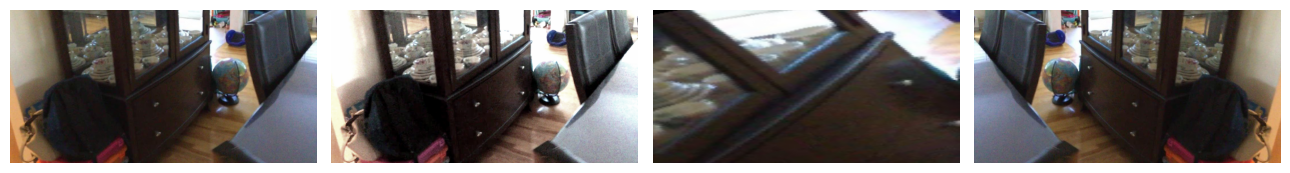

In [35]:
idx = 2
ori = Image.fromarray( np.uint8( torchvision.transforms.ColorJitter(0,0,0,0)(sn[idx] ).permute(1,2,0).numpy() * 255) )
color = Image.fromarray( np.uint8( torchvision.transforms.ColorJitter(0.6,0.6,0.6,0.05)(sn[idx] ).permute(1,2,0).numpy() * 255) )
crop = Image.fromarray( np.uint8( torchvision.transforms.RandomResizedCrop((320,640))(torchvision.transforms.RandomRotation(30)(sn[idx])).permute(1,2,0).numpy() * 255) )
flip = Image.fromarray( np.uint8( torchvision.transforms.RandomHorizontalFlip(p=1)(sn[idx]).permute(1,2,0).numpy() * 255) )

ori.save('docs/augmentation/1.png')
color.save('docs/augmentation/2.png')
crop.save('docs/augmentation/3.png')
flip.save('docs/augmentation/4.png')
crop

fig, ax = plt.subplots(1, 4, figsize=(textwidth, 1.8), sharex=True, sharey=True)
left  = 0  # the left side of the subplots of the figure
right = 1    # the right side of the subplots of the figure
bottom = 0.0   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 0.05   # the amount of width reserved for blank space between subplots
hspace = 0.0  # the amount of height reserved for white space between subplots


plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

ax[0].imshow(ori)
ax[1].imshow(color)
ax[2].imshow(crop)
ax[3].imshow(flip)

for a in ax.ravel():
    a.set_axis_off()

from visu.visualizer import get_img_from_fig

res = get_img_from_fig(fig, dpi=100)
imageio.imwrite( 'docs/augmentation_example.png', res)
